# ```CS F320 - FOUNDATIONS OF DATA SCIENCE```

## ```ASSIGNMENT 2A - Implementing PCA from Scratch```

## ```TEAM MEMBERS: ```
        1. Pavas Garg - 2021A7PS2587H
        2. Tushar Raghani - 2021A7PS1404H
        3. Rohan Pothireddy - 2021A7PS0365H 

# ```Importing the Libraries```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

# `⏳ Loading the Dataset`

In [2]:
df = pd.read_csv("audi.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
df.shape

(10668, 9)

In [4]:
# checking categorical variables
df.select_dtypes(exclude=['number']).head()

,model,transmission,fuelType
0,A1,Manual,Petrol
1,A6,Automatic,Diesel
2,A1,Manual,Petrol
3,A4,Automatic,Diesel
4,A3,Manual,Petrol


## ```Dropping Categorical Variables```

In [5]:
# Drop all categorical columns
df = df.select_dtypes(exclude='object')
df

,year,price,mileage,tax,mpg,engineSize
0,2017,12500,15735,150,55.4,1.4
1,2016,16500,36203,20,64.2,2.0
2,2016,11000,29946,30,55.4,1.4
3,2017,16800,25952,145,67.3,2.0
4,2019,17300,1998,145,49.6,1.0
...,...,...,...,...,...,...
10663,2020,16999,4018,145,49.6,1.0
10664,2020,16999,1978,150,49.6,1.0
10665,2020,17199,609,150,49.6,1.0
10666,2017,19499,8646,150,47.9,1.4


## ```Excluding the target variable```

In [6]:
target_var = df["price"]

In [7]:
df = df.drop(columns='price')

## ```1. Data Understanding and Representation```

In [8]:
print("Number of records in the given dataset are: ",len(df))
print("Number of features in the given dataset are: ",len(df.columns))

Number of records in the given dataset are:  10668
Number of features in the given dataset are:  5


In [9]:
# representing data in matrix format, each row representing a car, columns representing features
feature_matrix = df.values

In [10]:
print(feature_matrix)

[[2.0170e+03 1.5735e+04 1.5000e+02 5.5400e+01 1.4000e+00]
 [2.0160e+03 3.6203e+04 2.0000e+01 6.4200e+01 2.0000e+00]
 [2.0160e+03 2.9946e+04 3.0000e+01 5.5400e+01 1.4000e+00]
 ...
 [2.0200e+03 6.0900e+02 1.5000e+02 4.9600e+01 1.0000e+00]
 [2.0170e+03 8.6460e+03 1.5000e+02 4.7900e+01 1.4000e+00]
 [2.0160e+03 1.1855e+04 1.5000e+02 4.7900e+01 1.4000e+00]]


# ```🔬Preprocess and perform exploratory data analysis of the dataset obtained```

# `📊 Plotting Histograms`

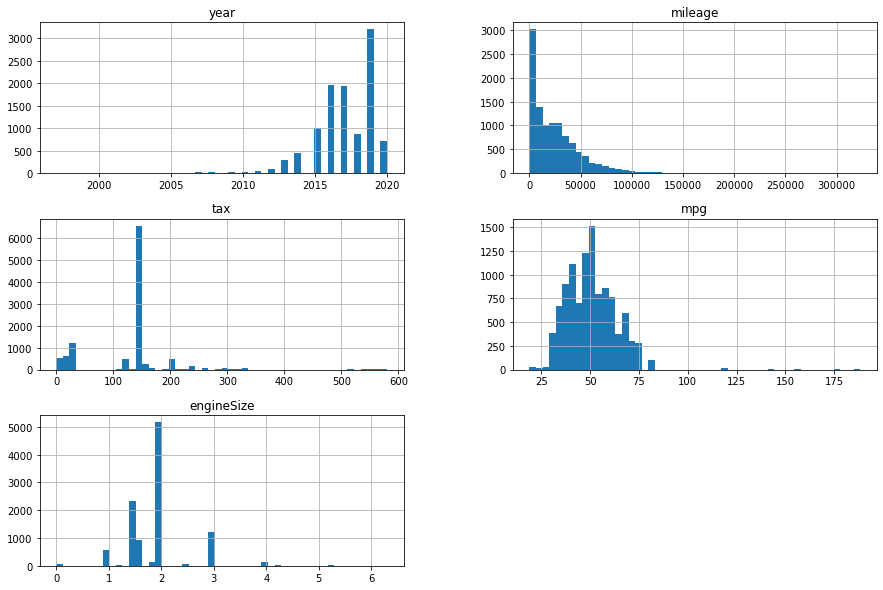

In [11]:
df.hist(bins=50,figsize=(15,10))
plt.show()

In [12]:
# understanding the given data
df.describe()

,year,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,24827.244001,126.011436,50.770022,1.930709
std,2.167494,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,323000.000000,580.000000,188.300000,6.300000


## ```Correlation Matrix```

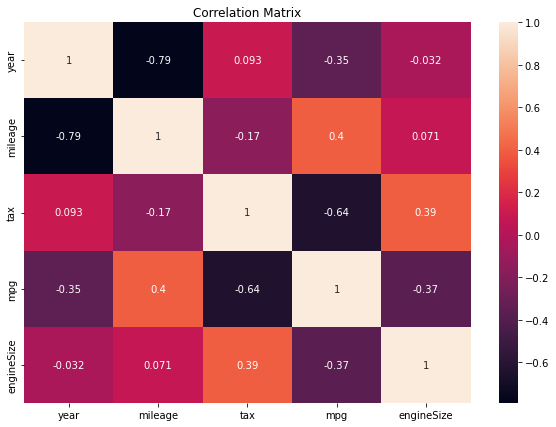

In [13]:
correlation = df.corr()
plt.subplots(figsize=(10,7))
heatmap = sns.heatmap(correlation,annot=True)
heatmap.set(title='Correlation Matrix')
plt.show()

## ```Plotting Box Plots```

In [14]:
def plot_boxplot(dataframe,feature):
    red_circle = dict(markerfacecolor='red', marker='o')
    mean_shape = dict(markerfacecolor='green',marker='D',markeredgecolor='green')
    dataframe.boxplot(column=[feature],flierprops = red_circle,showmeans=True,meanprops=mean_shape,notch=True)
    plt.grid(False)
    plt.show()

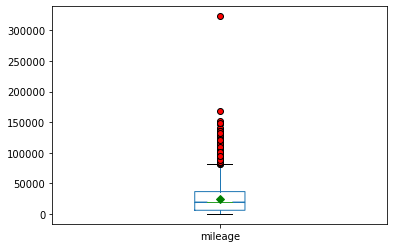

In [15]:
# red circles will be the outliers 
plot_boxplot(df,"mileage")

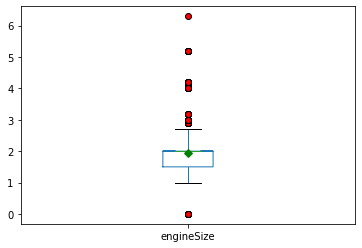

In [16]:
# red circles are the outliers 
plot_boxplot(df,"engineSize")

## ```2. Implementing PCA using Covariance Matrices```

- It is used to reduce the dimensionality of dataset by transforming a large set into a lower dimensional set that still contains most of the information of the large dataset

- Principal component analysis (PCA) is a technique that transforms a dataset of many features into principal components that "summarize" the variance that underlies the data

- PCA finds a new set of dimensions such that all dimensions are orthogonal and hence linearly independent and ranked according to variance of data along them

- Eigen vectors point in direction of maximum variance among data, and eigen value gives the importance of that eigen vector

![PCA_Image](https://miro.medium.com/v2/resize:fit:1192/format:webp/1*QinDfRawRskupf4mU5bYSA.png)

- First the dataset is centered by subtracting means from the feature values

- Means are calculated by 

$$
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

- Centered features are then compted as 

$$
x_i = x_i - \mu
$$

- Let $x_1$, $x_2$... $x_n$ be be N training examples, each having D features.


- Mean of N training examples is given by $\bar{x}$, which can be computed as

$$
\bar{x} = \frac{1}{N} \sum_{n=1}^{N} x_{n1} + \frac{1}{N} \sum_{n=1}^{N} x_{n2}... + \frac{1}{N} \sum_{n=1}^{N} x_{nd}
$$

- Now suppose we have a graph with 2-dimensional points as follows:
![2D_points](https://i.stack.imgur.com/ym6ru.png)

- Our motive is to bring down the 2D points to 1D by projecting on a vector. We need to project the points on a 1D vector such that the variance between data points is maximum.


- We need to compute unit vector such that the variance is as maximum as possible. 


- We do some mathematical computations as follows:

$$
cos\theta = \frac{OA}{OB}
$$

$$
\bar{u}cdot\bar{x_n} = (||u||)(||x||)cos\theta
                     = (||u||)(OB)cos\theta = (||u||)(OA)
$$

- The above equation gives us the below result

$$
OA = \frac{\bar{u} \cdot \bar{x_n}}{\|u\|}
$$

- We take projection on unit vector $||u||$ = 1

- Our final result is as follows:

$$
OA = \bar{u}\cdot\bar{x_n}
$$

- The mean of the projected points is given by 

$$
\frac{1}{N}\sum_{n=1}^{N}{\bar{u}\cdot\bar{x_n}} = \bar{u}\cdot\sum_{n=1}^N\frac{x_n}{N} = \bar{u}\cdot\bar{x}
$$

- Here, $\bar{x}$ is the mean of training points in their dimension

- We then compute variance as 

$$
Variance = \frac{1}{N}\sum_{n=1}^N{(\bar{u}\cdot\bar{x_n} - \bar{u}\cdot\bar{x})^2}
$$

- We then compute $\bar{u}$ which maximizes variance as much as possible such that $||u|| = 1$

- Consider $x_n$ and $\bar{x}$ to be matrices of $d$x$1$ size represented as follows

$$
\bar{x_n}=\begin{bmatrix}
  x_1 \\
  x_2 \\
  x_3 \\
  \vdots \\
  x_d \\
\end{bmatrix}
$$


$$
\bar{x}=\begin{bmatrix}
  \bar{x_1} \\
  \bar{x_2} \\
  \bar{x_3} \\
  \vdots \\
  \bar{x_d} \\
\end{bmatrix}
$$

- Consider $\bar{u}$ to be a $1$x$d$ matrix represented by

$$
\bar{u} = [{u_1}, {u_2}...{u_d}]
$$

- We then observe that we need to maximize the following expression

$$
max[\frac{1}{N}\sum_{n=1}^{N}(\bar{u}\cdot(\bar{x_n}-\bar{x}))(\bar{u}\cdot(\bar{x_n}-\bar{x})^{T}]
$$

- While trying to maximize the above expression by expanding the same, we get

$$
max[\frac{1}{N}\sum_{n=1}^{N}(\bar{u}(x_n - \bar{x})(x_n - \bar{x})^{T}\bar{u}^{T})]
$$

- The above expression in turn becomes

$$
max[\bar{u}\frac{1}{N}[\sum_{n=1}^{N}(x_n - \bar{x})(x_n - \bar{x})^{T}]\bar{u}^{T}]
$$

- The above expression simplifies to 

$$
max[\bar{u}S\bar{u}^T] 
$$

$$
||u||=1
$$
- Here, $S$ is called covariance matrix 


- Principal Component Analysis (PCA) gives linear combination of these features to get matured features


- We then try to convert the above constraint optimization problem to an unconstrained optimization problem, as follows:

$$
E(u,\lambda) = max[\bar{u}S\bar{u}^{T} + \frac{\lambda}{2}(1-\bar{u}\bar{u}^{T})]
$$

- Taking derivation with respect to $\bar{u}$ and $\lambda$ and setting it to 0, we get final answer to be 

$$
\bar{u}S\bar{u}^T = \lambda
$$

- $\lambda$ is called the eigen value found from the equation

$$
|A - \lambda{I}| = 0
$$

- Let $u_1$, $u_2$,...$u_d$ be the eigen vectors, and $\lambda_1$, $\lambda_2$,...$\lambda_d$ be the eigen values, $A$ is a $d$x$d$ square matrix, we get 

$$
A\gamma = \lambda\gamma
$$

$$
Au_1 = \lambda_1u_1
$$

$$
Au_2 = \lambda_2u_2
$$

- Any of d $\bar{u}$ values are feasible solutions, we need to find optimal solution from the following set of equations

$$
Su_1 = \lambda_1u_1 
$$
$$
Su_2 = \lambda_2u_2 
$$

$$
.
$$

$$
.
$$

$$
.
$$

$$
Su_d = \lambda_du_d 
$$

- The above set of equations simplifies to

$$
u_1Su_1^{T} = \lambda_1
$$

$$
u_2Su_2^{T} = \lambda_2
$$

$$
.
$$

$$
.
$$

$$
.
$$

$$
u_dSu_d^{T} = \lambda_d
$$

- For instance, if we project all points on eigen vector $u_1$ then variance comes out to be $\lambda_1$


- $\lambda_1$, $\lambda_2$, ...., $\lambda_d$ are variances after projecting values/points on eigen vectors $u_1$, $u_2$,....,$u_d$. We need to find that eigen vector which has maximum variance, or simply, maximum $\lambda$.


- For instance, consider the first eigen vector to be of the form 

$$
u_1 = \begin{bmatrix}
  \bar{u_{11}} \\
  \bar{u_{12}} \\
  \bar{u_{13}} \\
  \vdots \\
  \bar{u_{1d}} \\
\end{bmatrix} 
$$

- Transformed point is 

$$
u_{11}x_{11} + u_{12}x_{12}+... + u_{1d}x_{1d}
$$

- Transformation of a point from multidimensional space (d-dimensional in this case) to a uni-dimensional space is a linear transformation (where multiples are componenents of eigen vectors in PCA)

In [17]:
# calculating mean of each feature in the dataset
feature_means = df.mean()
feature_means

year           2017.100675
mileage       24827.244001
tax             126.011436
mpg              50.770022
engineSize        1.930709
dtype: float64

In [18]:
# Centering the dataset by subtracting the mean from each feature. 
centered_features = df - feature_means

In [19]:
centered_features.head()

,year,mileage,tax,mpg,engineSize
0,-0.100675,-9092.244001,23.988564,4.629978,-0.530709
1,-1.100675,11375.755999,-106.011436,13.429978,0.069291
2,-1.100675,5118.755999,-96.011436,4.629978,-0.530709
3,-0.100675,1124.755999,18.988564,16.529978,0.069291
4,1.899325,-22829.244001,18.988564,-1.170022,-0.930709


## ```Covariance matrix of the centered dataset```

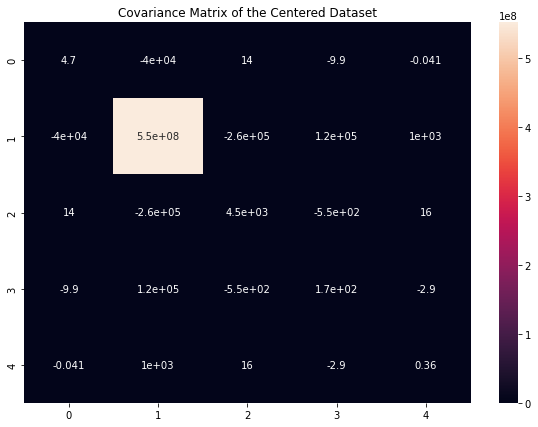

In [20]:
# covariance matrix of centered feature values
covariance_matrix = np.cov(centered_features,rowvar=False)
plt.subplots(figsize=(10,7))
heatmap = sns.heatmap(covariance_matrix,annot=True)
heatmap.set(title='Covariance Matrix of the Centered Dataset')
plt.show()

## ```3. Eigenvalue Eigenvector Equation```

For a square matrix $A$, if $\mathbf{v}$ is an eigenvector and $\lambda$ is the corresponding eigenvalue, the eigenvalue-eigenvector equation is given by 
 
$$
A \mathbf{v} = \lambda \mathbf{v} 
$$

In [21]:
# finding eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
# transpose eigenvector
eigenvectors = eigenvectors.T
    
# will give indexes according to eigen values, sorted in decreasing order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[idx]

## ```4. Solving for Principal Components ```

In [22]:
print(eigenvalues)

[5.52497271e+08 4.44392581e+03 8.44121646e+01 1.72584583e+00
 2.82457928e-01]


In [23]:
print(eigenvectors)

[[ 7.28176631e-05 -9.99999860e-01  4.75940888e-04 -2.17675259e-04
  -1.81384120e-06]
 [-1.22350540e-03  4.97635688e-04  9.93414801e-01 -1.14504431e-01
   3.74489446e-03]
 [-2.10100343e-02 -1.63185503e-04  1.14495419e-01  9.93103163e-01
  -1.39806367e-02]
 [ 9.99593344e-01  6.98862164e-05  3.58032275e-03  2.10014069e-02
   1.89542395e-02]
 [-1.92411557e-02 -7.28558351e-06 -2.18799844e-03  1.39189142e-02
   9.99715587e-01]]


In [24]:
# for finding how much variance does each principal component capture
explained_variance = eigenvalues / np.sum(eigenvalues)

In [25]:
print(explained_variance)

[9.99991800e-01 8.04327841e-06 1.52781700e-07 3.12369269e-09
 5.11234403e-10]


In [26]:
# slicing first k eigenvectors
# let k = 5
k = 5
k_principal_components = eigenvectors[:k]

In [27]:
print(k_principal_components)

[[ 7.28176631e-05 -9.99999860e-01  4.75940888e-04 -2.17675259e-04
  -1.81384120e-06]
 [-1.22350540e-03  4.97635688e-04  9.93414801e-01 -1.14504431e-01
   3.74489446e-03]
 [-2.10100343e-02 -1.63185503e-04  1.14495419e-01  9.93103163e-01
  -1.39806367e-02]
 [ 9.99593344e-01  6.98862164e-05  3.58032275e-03  2.10014069e-02
   1.89542395e-02]
 [-1.92411557e-02 -7.28558351e-06 -2.18799844e-03  1.39189142e-02
   9.99715587e-01]]


In [28]:
k_principal_components_eigenvalues = eigenvalues[:k]

## ```5. Sequential Variance Increase```

In [29]:
# total variance covered by principal components
total_variance = np.sum(k_principal_components_eigenvalues)

In [30]:
print(total_variance)

552501800.8994668


In [31]:
# new features after applying PCA
pca_df = np.dot(centered_features,k_principal_components.T)
pca_df = pd.DataFrame(pca_df)
pca_df.head()

,0,1,2,3,4
0,9092.253134,18.773952,8.837883,-0.562993,-0.450421
1,-11375.807870,-101.188533,-0.634673,-0.401412,0.426454
2,-5118.802067,-93.362700,-7.199586,-0.999072,-0.272155
3,-1124.750410,17.530866,18.407679,0.394422,0.251547
4,22829.250246,7.631037,4.710659,0.328875,-0.858497


## ```Plot showing spread of data along first 2 Principal Components```

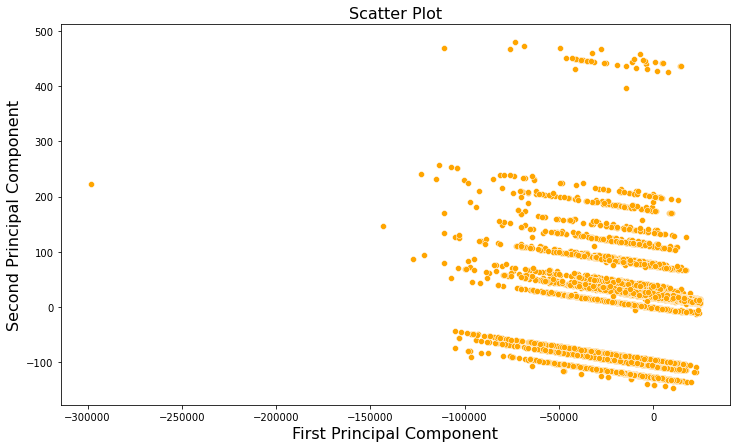

In [32]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=pca_df,x=0,y=1,color='orange')
plt.title("Scatter Plot",fontsize=16)
plt.xlabel('First Principal Component',fontsize=16)
plt.ylabel('Second Principal Component',fontsize=16)
plt.show()

## ```Plot showing variance captured by each Principal Component```

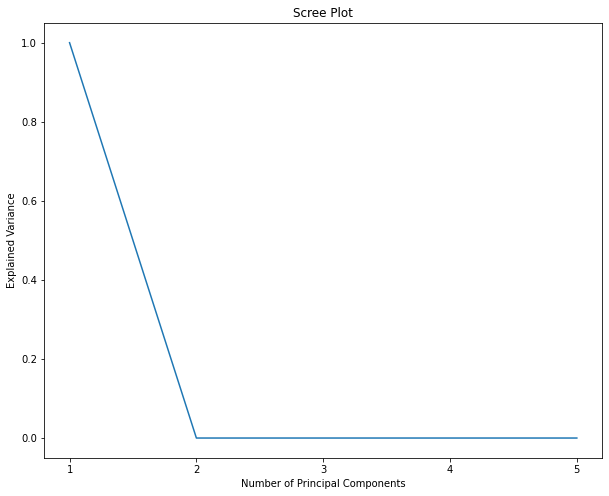

In [33]:
num_components = len(explained_variance)
components = np.arange(1, num_components + 1)
plt.figure(figsize=(10, 8))
plt.plot(components, explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.xticks(components)
plt.show()

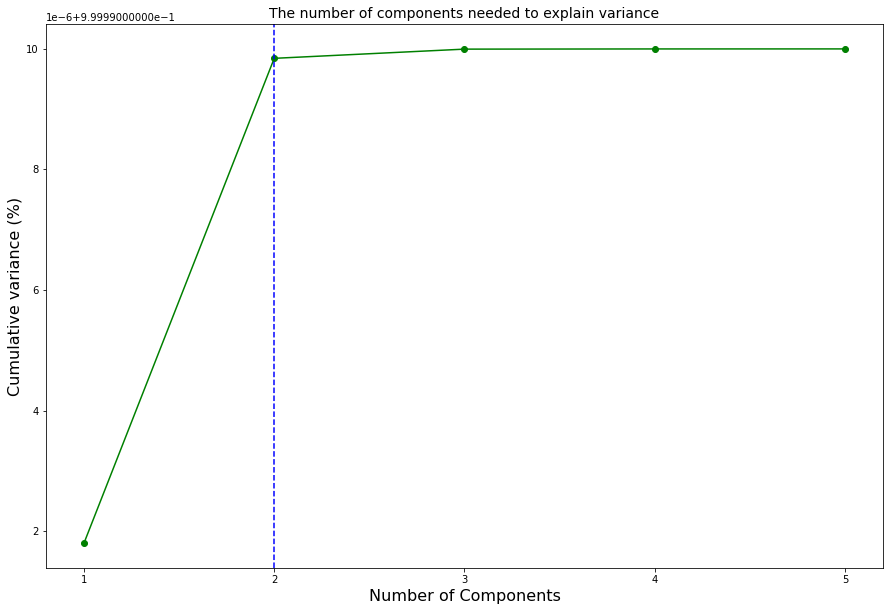

In [34]:
# finding cumulative variance captured by principal components
y_var = np.cumsum(explained_variance)

plt.figure(figsize=(15,10))
plt.plot(components, y_var, marker='o', linestyle='-', color='green')
plt.title('The number of components needed to explain variance',fontsize=14)
plt.xlabel('Number of Components',fontsize=16)
plt.ylabel('Cumulative variance (%)',fontsize=16)
plt.xticks(components)

# line showing number of principal components required to capture most of the variance
plt.axvline(x=2.00, color='blue', linestyle='--')

plt.show()

-  ```We can see that the complete variance is captured by the first 2 principal components and there is very insignificant sequential increase in the variance as we consider more principal components```

## ```Standardized Dataset```

In [35]:
df_standardized = (df-df.mean())/(df.std())
df_standardized

,year,mileage,tax,mpg,engineSize
0,-0.046448,-0.386817,0.357131,0.357533,-0.880177
1,-0.507810,0.483966,-1.578249,1.037081,0.114919
2,-0.507810,0.217771,-1.429373,0.357533,-0.880177
3,-0.046448,0.047851,0.282693,1.276468,0.114919
4,0.876277,-0.971240,0.282693,-0.090351,-1.543575
...,...,...,...,...,...
10663,1.337639,-0.885302,0.282693,-0.090351,-1.543575
10664,1.337639,-0.972091,0.357131,-0.090351,-1.543575
10665,1.337639,-1.030333,0.357131,-0.090351,-1.543575
10666,-0.046448,-0.688410,0.357131,-0.221627,-0.880177


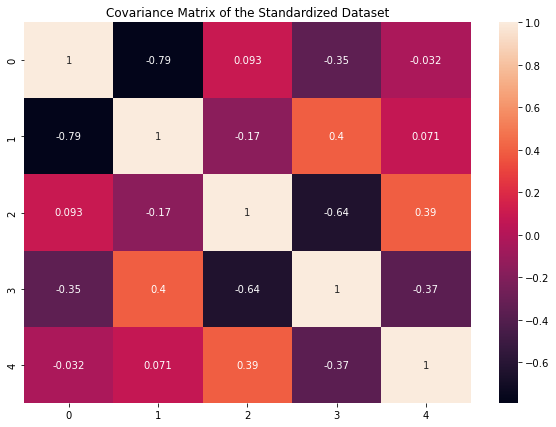

In [36]:
# covariance matrix of centered feature values
covariance_matrix = np.cov(df_standardized,rowvar=False)
plt.subplots(figsize=(10,7))
heatmap = sns.heatmap(covariance_matrix,annot=True)
heatmap.set(title='Covariance Matrix of the Standardized Dataset')
plt.show()

In [37]:
# finding eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
# transpose eigenvector
eigenvectors = eigenvectors.T
    
# will give indexes according to eigen values, sorted in decreasing order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[idx]

## ```4. Solving for Principal Components ```

In [38]:
print(eigenvalues)

[2.31297823 1.54968025 0.62002561 0.31552269 0.20179322]


In [39]:
print(eigenvectors)

[[-0.46373634  0.48575669 -0.43356476  0.5485194  -0.24522869]
 [ 0.48249022 -0.46716498 -0.43702648  0.22908421 -0.55271001]
 [-0.26369364  0.0732536   0.49512711 -0.24802587 -0.7864044 ]
 [-0.10806712  0.17892982 -0.60322362 -0.76491314 -0.08564328]
 [ 0.68624992  0.7130325   0.10954391 -0.00616002 -0.09277865]]


In [40]:
# for finding how much variance does each principal component capture
explained_variance = eigenvalues / np.sum(eigenvalues)

In [41]:
print(explained_variance)

[0.46259565 0.30993605 0.12400512 0.06310454 0.04035864]


In [42]:
# slicing first k eigenvectors
# let k = 5
k = 5
k_principal_components = eigenvectors[:k]

In [43]:
print(k_principal_components)

[[-0.46373634  0.48575669 -0.43356476  0.5485194  -0.24522869]
 [ 0.48249022 -0.46716498 -0.43702648  0.22908421 -0.55271001]
 [-0.26369364  0.0732536   0.49512711 -0.24802587 -0.7864044 ]
 [-0.10806712  0.17892982 -0.60322362 -0.76491314 -0.08564328]
 [ 0.68624992  0.7130325   0.10954391 -0.00616002 -0.09277865]]


In [44]:
k_principal_components_eigenvalues = eigenvalues[:k]

## ```5. Sequential Variance Increase```

In [45]:
# total variance covered by principal components
total_variance = np.sum(k_principal_components_eigenvalues)

In [46]:
print(total_variance)

4.999999999999998


In [47]:
# new features after applying PCA
pca_df = np.dot(centered_features,k_principal_components.T)
pca_df = pd.DataFrame(pca_df)
pca_df.head()

,0,1,2,3,4
0,-4424.302480,4238.399752,-654.866693,-1644.829238,-6480.486066
1,5579.672435,-5265.517780,777.730738,2089.250806,8098.826369
2,2531.277346,-2348.521084,326.988690,970.437316,3638.587313
3,547.221687,-530.045234,87.666376,177.158985,803.890325
4,-11098.985097,10657.887583,-1662.401338,-4095.517419,-16274.515937


## ```Plot showing spread of data along first 2 Principal Components```

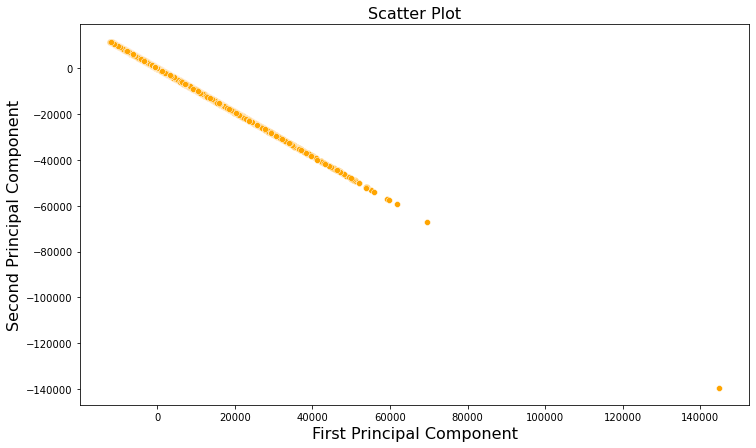

In [48]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=pca_df,x=0,y=1,color='orange')
plt.title("Scatter Plot",fontsize=16)
plt.xlabel('First Principal Component',fontsize=16)
plt.ylabel('Second Principal Component',fontsize=16)
plt.show()

## ```Plot showing variance captured by each Principal Component```

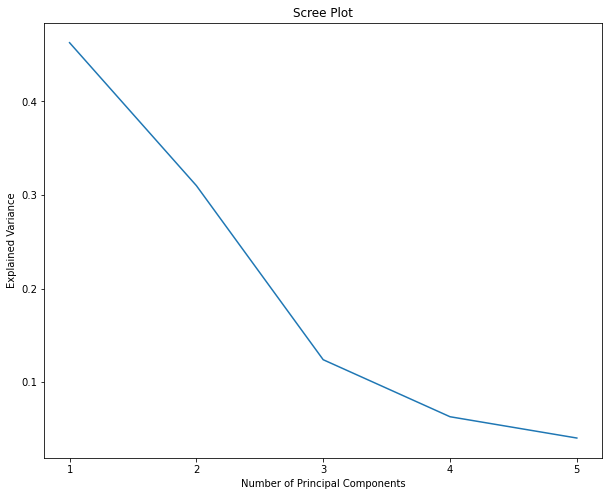

In [49]:
num_components = len(explained_variance)
components = np.arange(1, num_components + 1)
plt.figure(figsize=(10, 8))
plt.plot(components, explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.xticks(components)
plt.show()

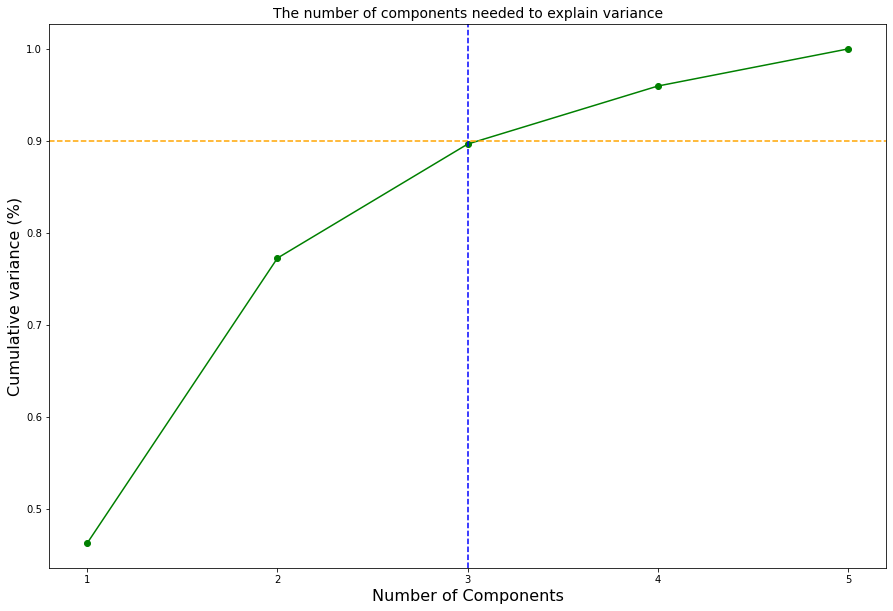

In [50]:
# finding cumulative variance captured by principal components
y_var = np.cumsum(explained_variance)

plt.figure(figsize=(15,10))
plt.plot(components, y_var, marker='o', linestyle='-', color='green')
plt.title('The number of components needed to explain variance',fontsize=14)
plt.xlabel('Number of Components',fontsize=16)
plt.ylabel('Cumulative variance (%)',fontsize=16)
plt.axhline(y=0.9,color='orange',linestyle='--')
plt.xticks(components)

# line showing number of principal components required to capture most of the variance
plt.axvline(x=3.00, color='blue', linestyle='--')

plt.show()

-  ```We can see that the complete variance is captured by the first 3 principal components and there is very insignificant sequential increase in the variance as we consider more principal components```

## ```6. Visualization using Pair Plots```

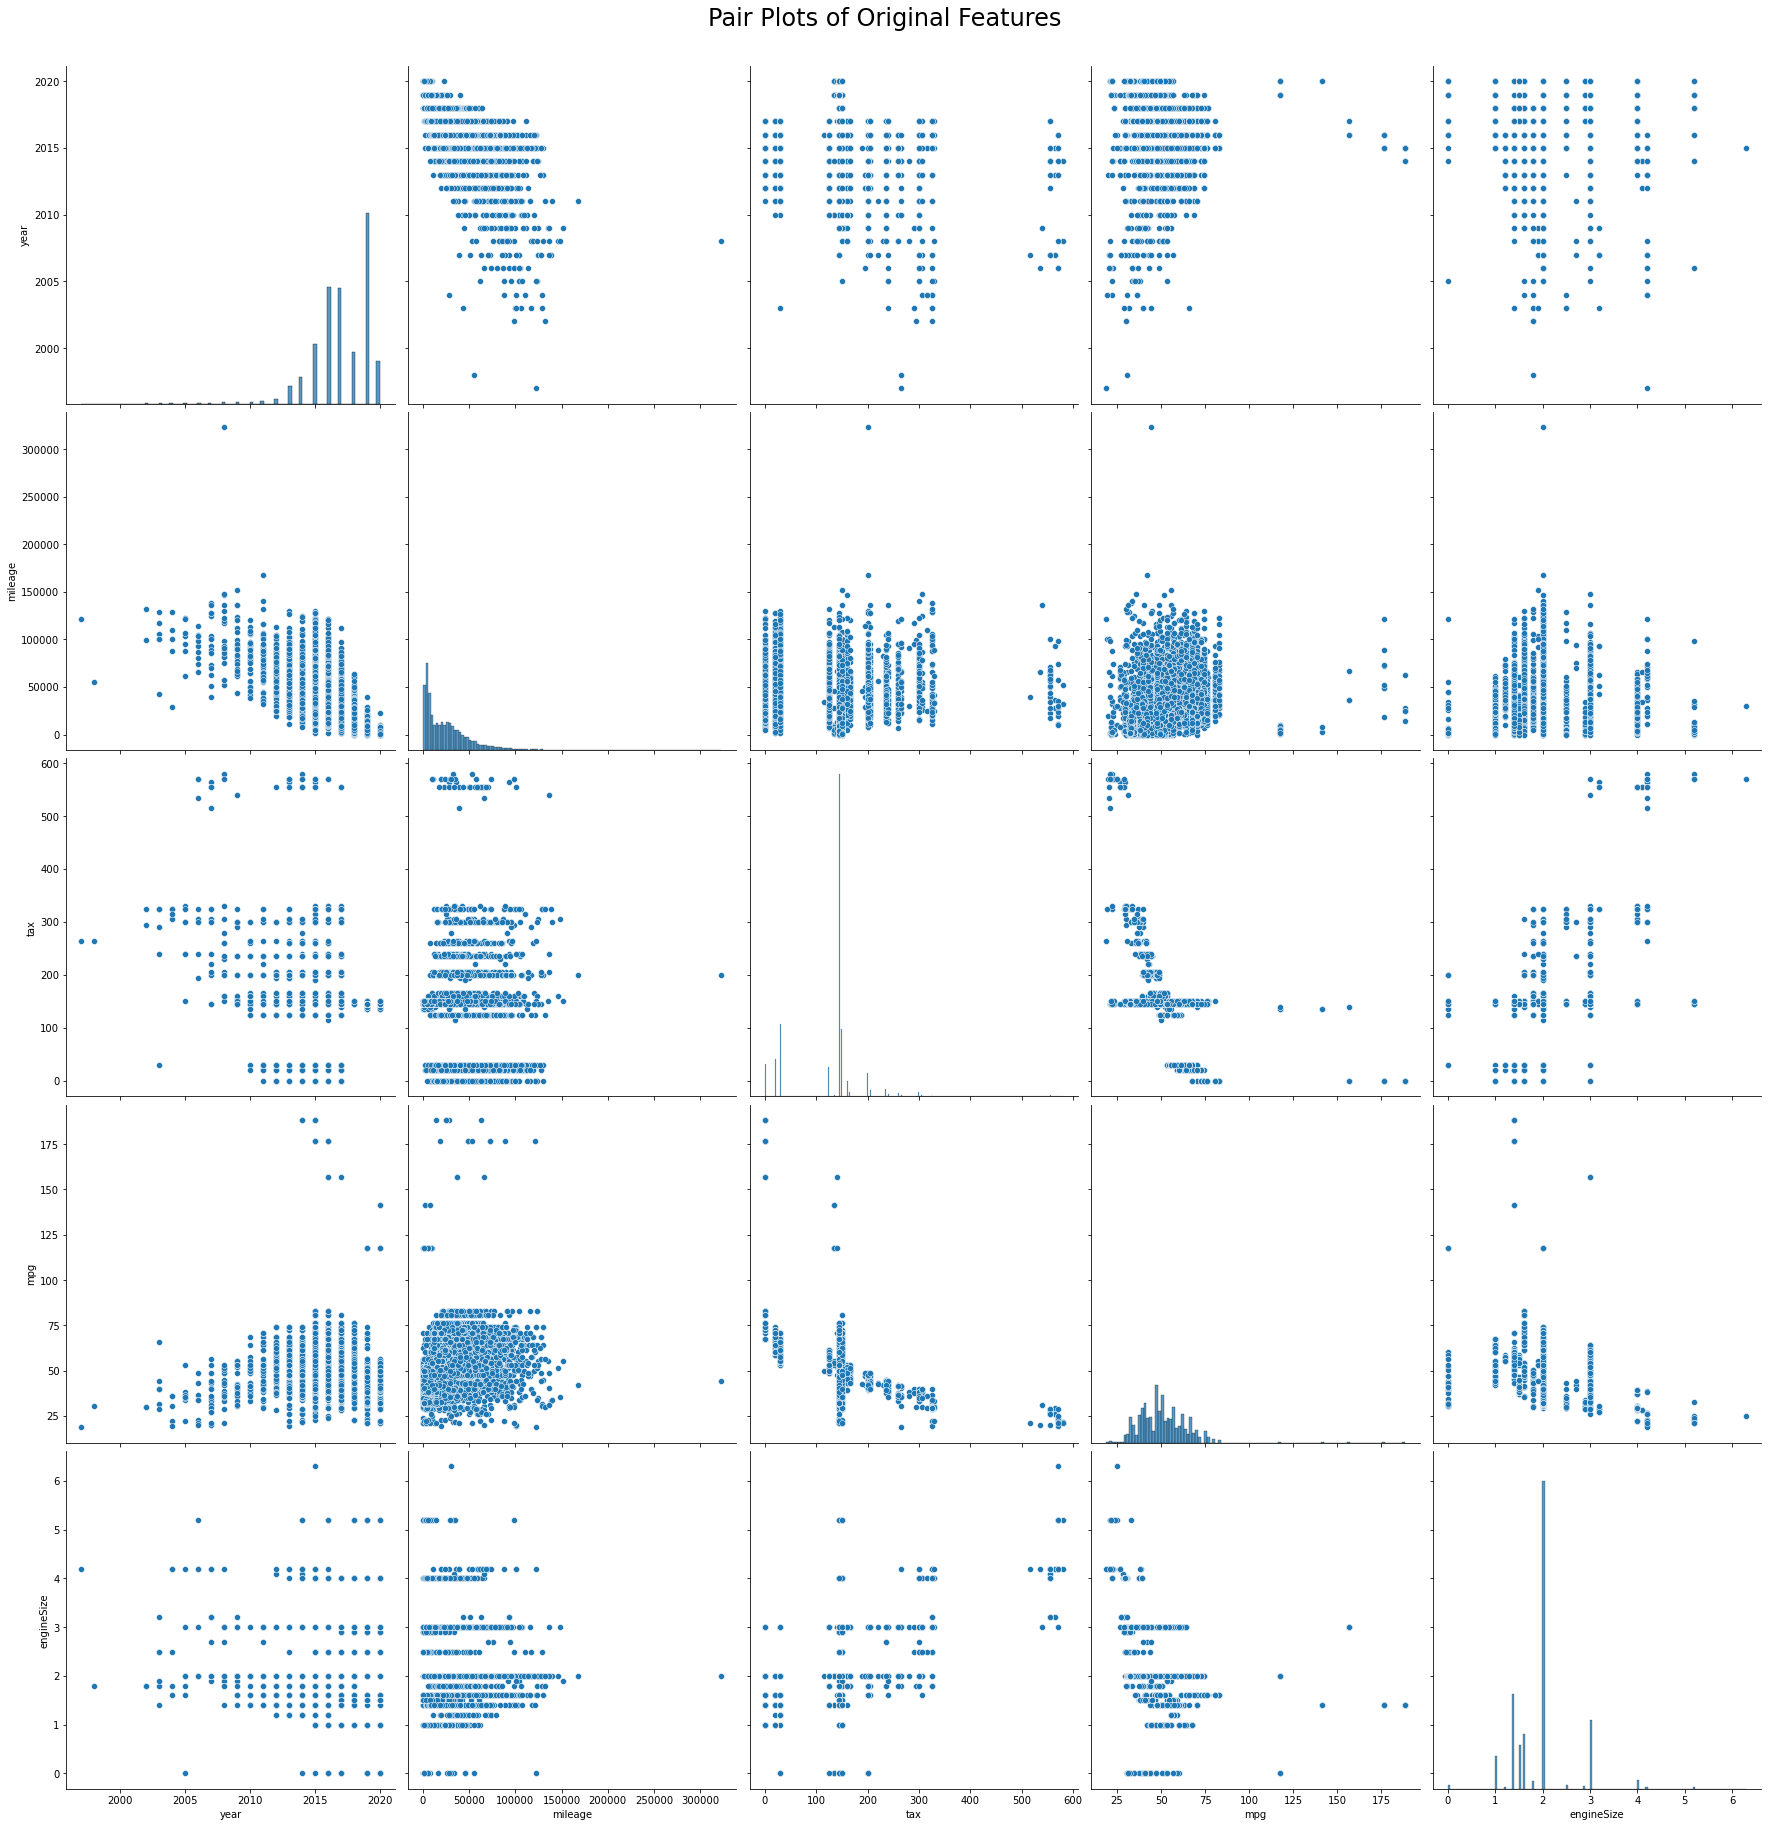

In [51]:
# pair plot of original features
original_pair_plot = sns.pairplot(pd.DataFrame(df,columns=df.columns),height=5)

# Set the title of the figur
original_pair_plot.fig.suptitle('Pair Plots of Original Features', y=1.02, fontsize=24)

# Display the pair plots
plt.show()

## ```Projecting Principal Components on Original Dataset```

- Projecting principal components onto these pair plots and visualizing them as vectors, as we have 5 principal components and each of these 5 vectors have 5 components, so for projecting principal components onto these plots, we will take ith and jth component of every eigenvector for plotting it on the pair plot for ith and jth feature in original dataset

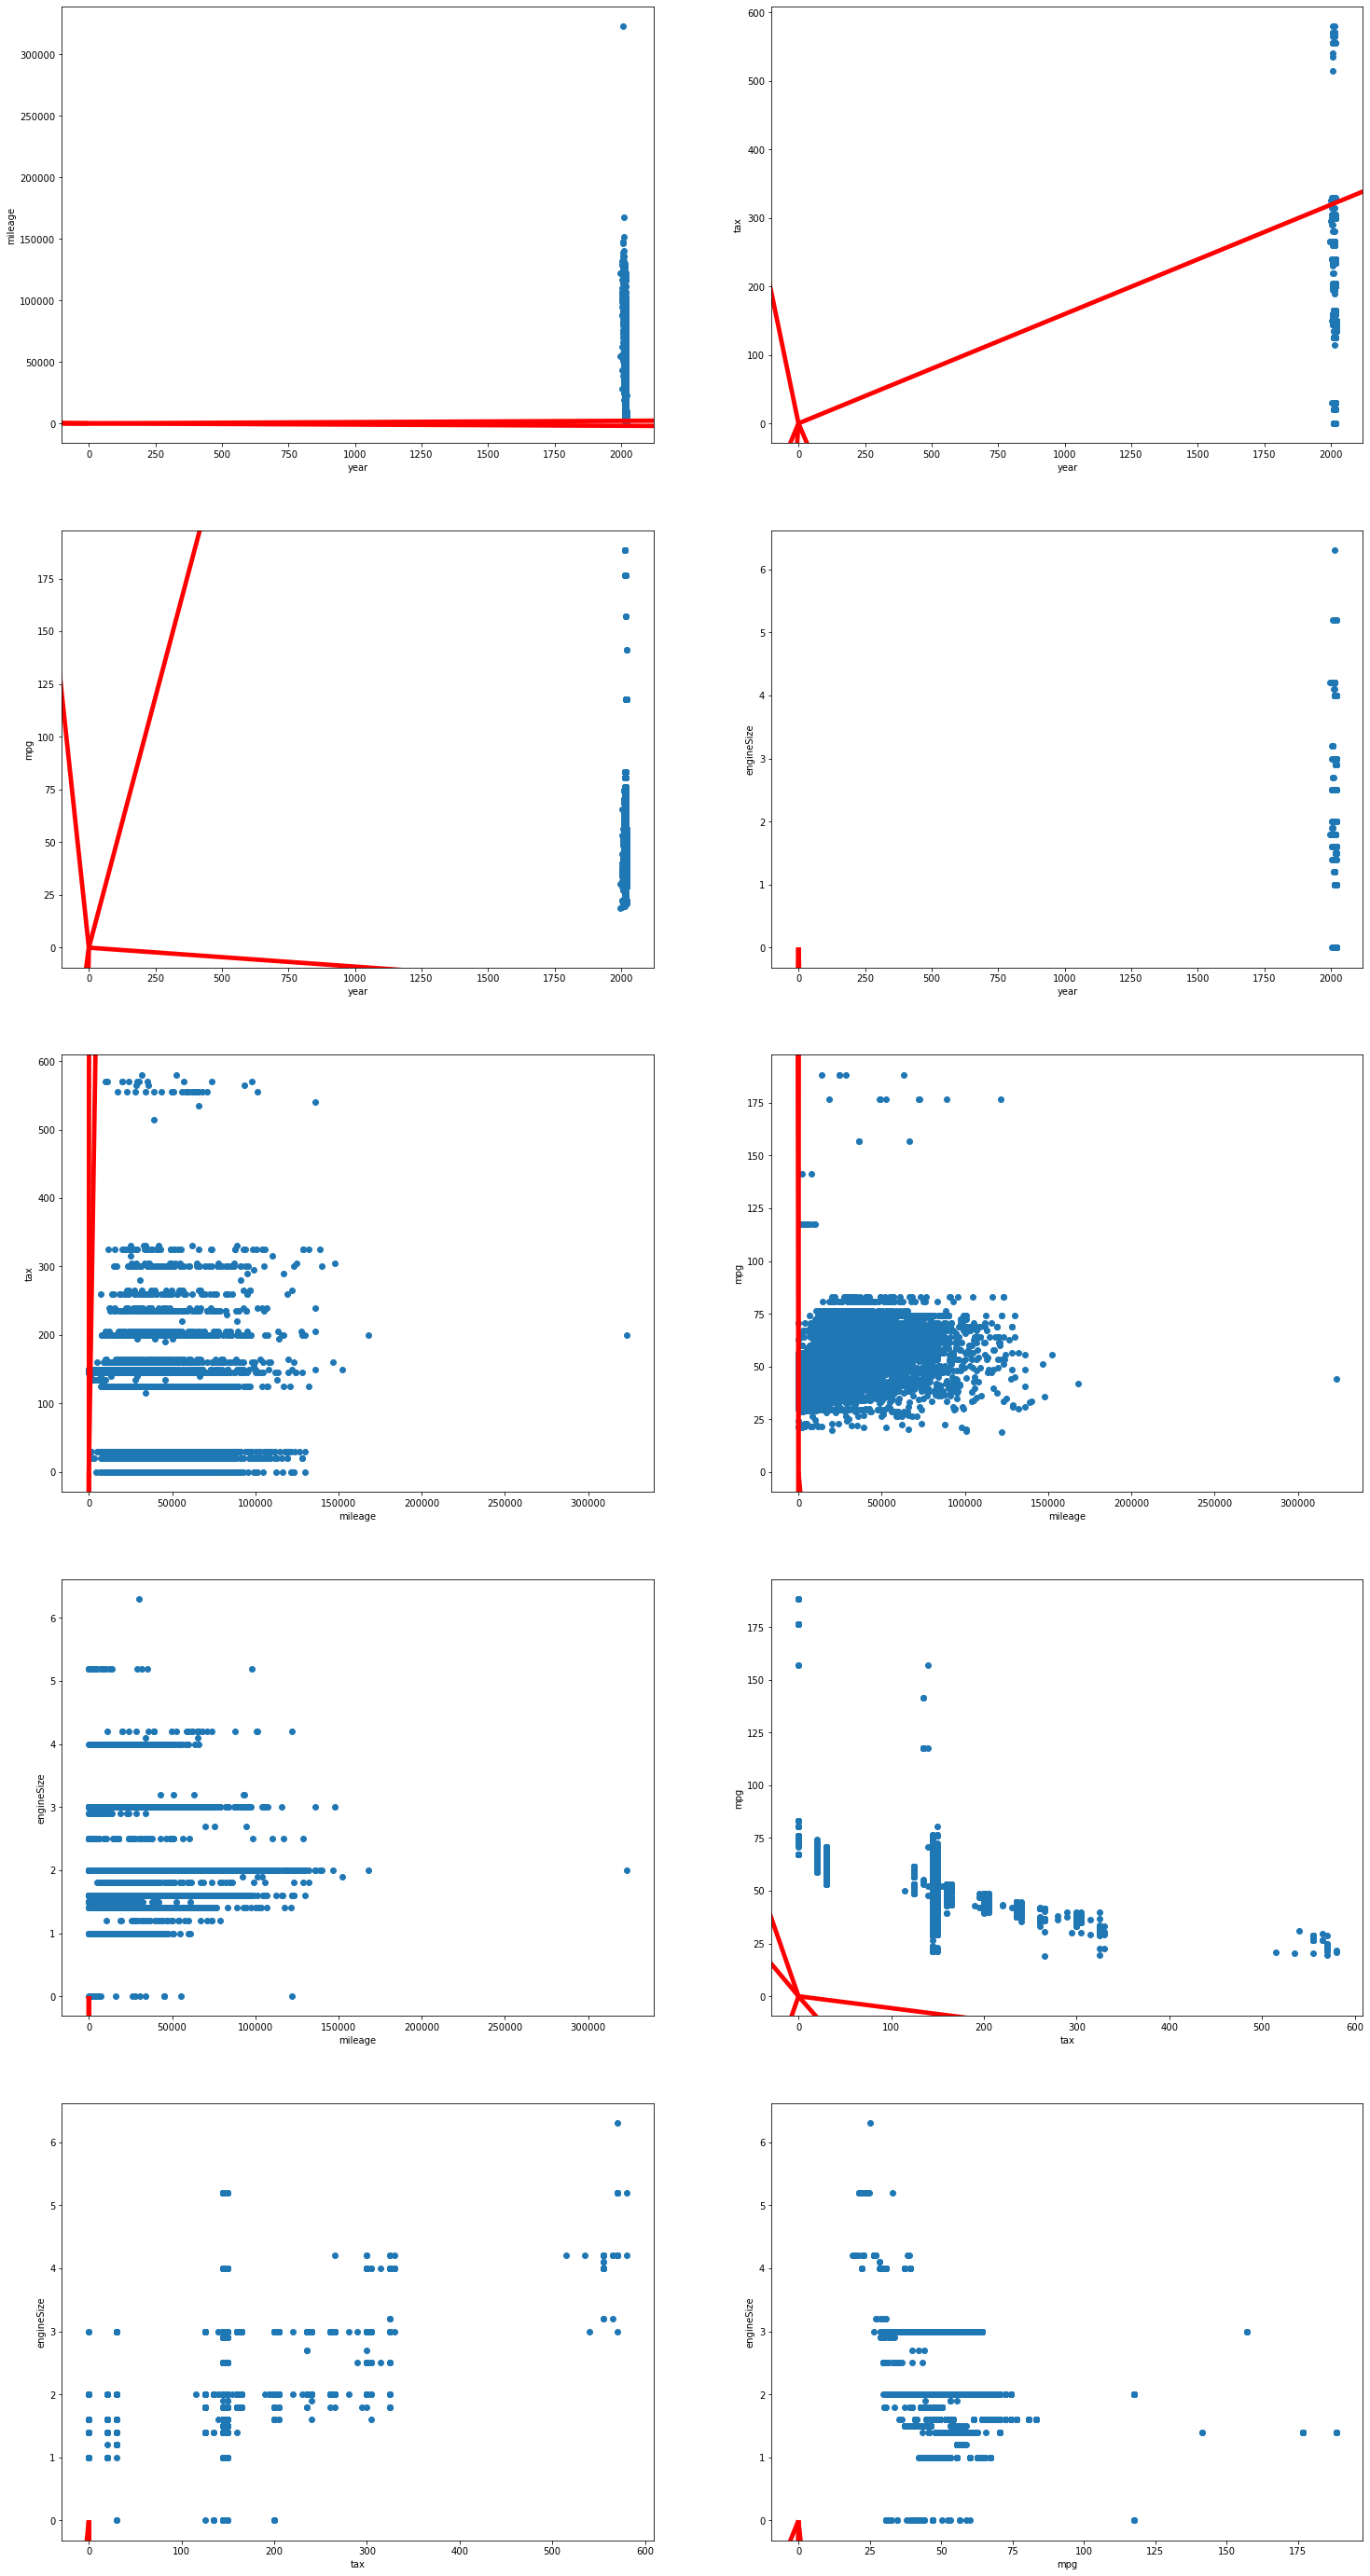

In [52]:
# projecting principal components onto these plots and visualizing them as vectors
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(25,50))

# for going on every feature in original dataset
row, col = 0,0
for i in range(0,5):
    for j in range(i+1,5):
        # this will plot scatter plot for all points for ith and jth feature
        ax[row,col].scatter(df.iloc[:,i],df.iloc[:,j],label=f'original')
        ax[row,col].set_xlabel(df.columns[i])
        ax[row,col].set_ylabel(df.columns[j])
        # plotting each and every eigenvector
        for vec in eigenvectors:
            # plotting ith and jth component of each eigenvector
            ax[row,col].quiver(0, 0, vec[i], vec[j], angles='xy', scale_units='xy', scale=0.00001, color='r')
        col += 1
        if col > 1:
            col = 0
            row += 1
plt.show()

## ```Projecting Principal Components on Centered Dataset```

- We can observe that points on scatter plot are around projected principal components, because the data is centered around the mean.

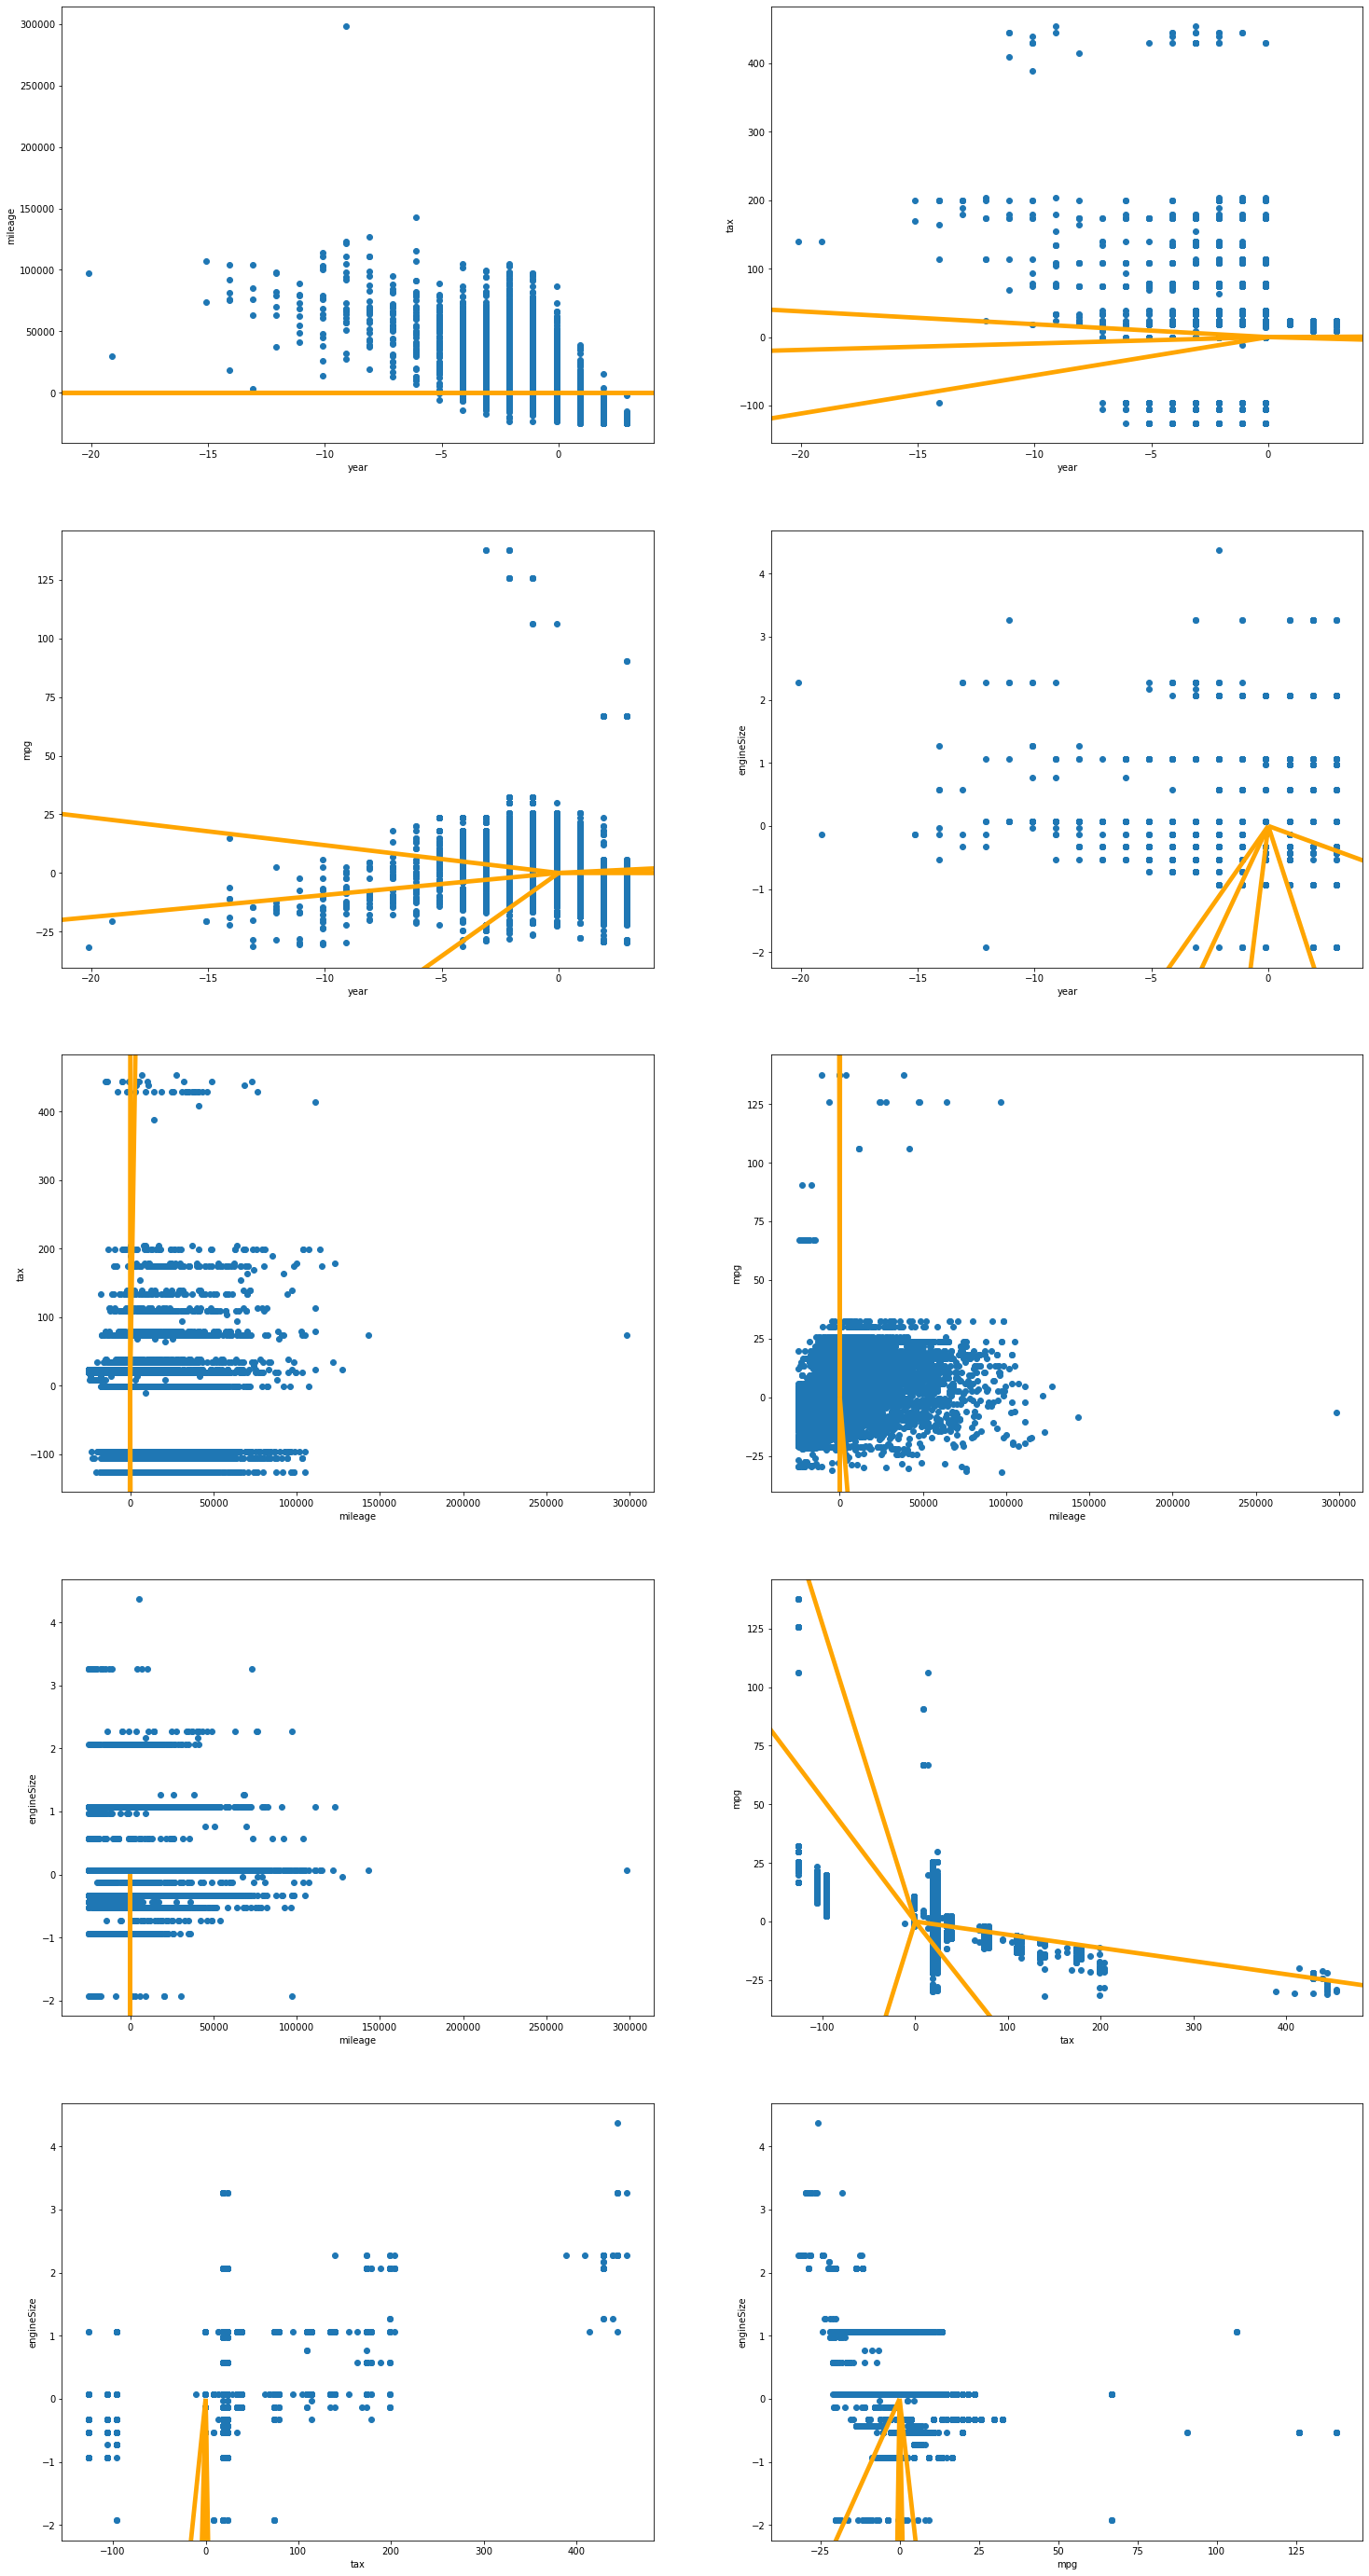

In [53]:
# projecting principal components onto these plots and visualizing them as vectors
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(25,50))

# for going on every feature in original dataset
row, col = 0,0
for i in range(0,5):
    for j in range(i+1,5):
        # this will plot scatter plot for all points for ith and jth feature
        ax[row,col].scatter(centered_features.iloc[:,i],centered_features.iloc[:,j],label=f'original')
        ax[row,col].set_xlabel(df.columns[i])
        ax[row,col].set_ylabel(df.columns[j])
        # plotting each and every eigenvector
        for vec in eigenvectors:
            # plotting ith and jth component of each eigenvector
            ax[row,col].quiver(0, 0, vec[i], vec[j], angles='xy', scale_units='xy', scale=0.00001, color='orange')
        col += 1
        if col > 1:
            col = 0
            row += 1
plt.show()

## ```Projecting Principal Components on Standardized Dataset```

- We can see that points on scatter plot are around the vectors, as here we have properly scaled dataset

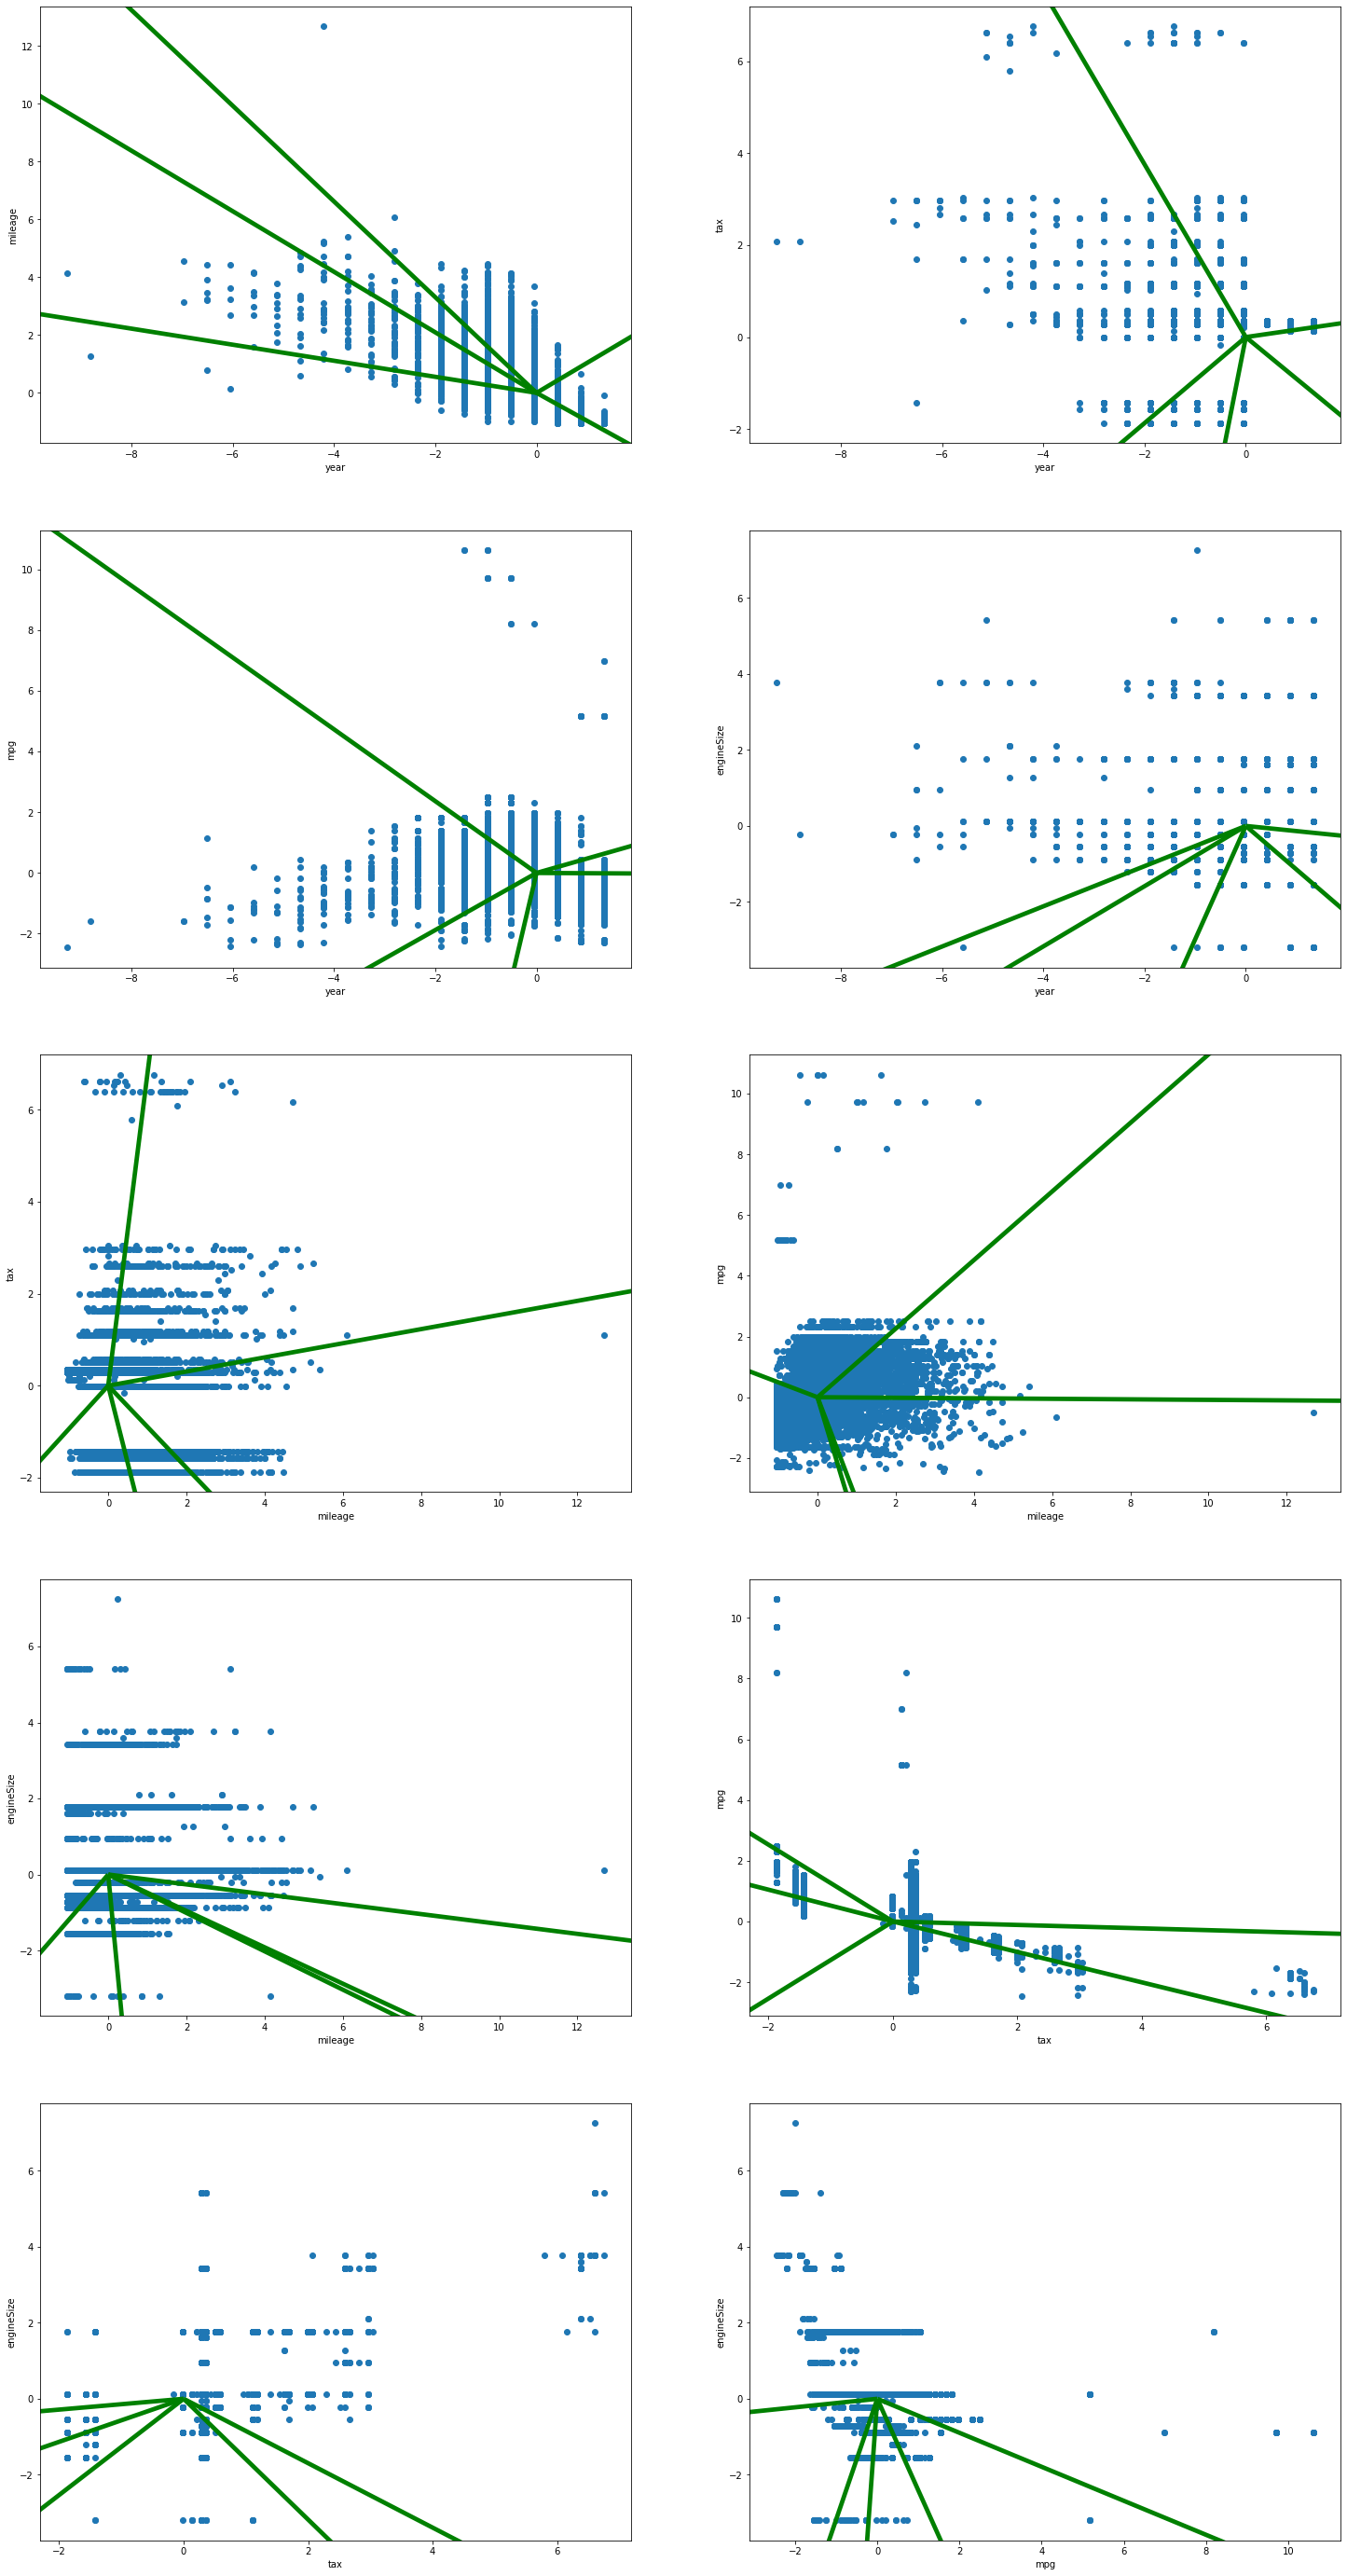

In [54]:
df_std = (df-df.mean())/df.std()

# projecting principal components onto these plots and visualizing them as vectors
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(25,50))

# for going on every feature in original dataset
row, col = 0,0
for i in range(0,5):
    for j in range(i+1,5):
        # this will plot scatter plot for all points for ith and jth feature
        ax[row,col].scatter(df_std.iloc[:,i],df_std.iloc[:,j],label=f'original')
        ax[row,col].set_xlabel(df.columns[i])
        ax[row,col].set_ylabel(df.columns[j])
        # plotting each and every eigenvector
        for vec in eigenvectors:
            # plotting ith and jth component of each eigenvector
            ax[row,col].quiver(0, 0, vec[i], vec[j], angles='xy', scale_units='xy', scale=0.001, color='g')
        col += 1
        if col > 1:
            col = 0
            row += 1
plt.show()

## ```7. Conclusion and Interpretation```

- We can see that maximum variance is captured by first two principal components, which helps us in reducing dimension of dataset from 5 features to 2 features while retaining most of the information.


- PCA is a dimensionality reduction technique, and dimensionality reduction is the process of reducing the number of features in a dataset while retaining as much information as possible. This can be done to reduce the complexity of a model, improve the performance of a learning algorithm, or make it easier to visualize the data.


- PCA converts a set of correlated features in the high dimensional space into a series of uncorrelated features in the low dimensional space. These uncorrelated features are also called principal components.


- We can see that points on scatter plot are around the vectors when we take projections of principal components for a standardized dataset, as here we have properly scaled dataset, unlike when we took projection on original dataset.